## Imports

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.dpi'] =1000
plt.rcParams['text.usetex']=False

## Grab Data

In [2]:
noise_list = [0.0,0.1, 0.2,0.3, 0.4]
imbalance_list = [0.5, 0.8]

df = pd.DataFrame(columns=['alpha','mse', 'imbalance', 'noise'])
kl_df = pd.DataFrame(columns=['alpha', 'kl', 'imbalance', 'noise'])

for (noise,imbalance) in ((n,i) for n in noise_list for i in imbalance_list):
    if 1- imbalance < noise/2: continue
    print(noise,imbalance)
    data = pd.read_pickle('mse_{imbalance}_{noise}.pkl'.format(imbalance=imbalance, noise=noise))
    data['imbalance'] = imbalance
    data['noise'] = noise
    kl_data = pd.read_pickle('kl_{imbalance}_{noise}.pkl'.format(imbalance=imbalance, noise=noise))
    kl_data['imbalance'] = imbalance
    kl_data['noise'] = noise
    df = pd.concat([df,data], ignore_index=True)
    kl_df = pd.concat([kl_df, kl_data], ignore_index=True)


0.0 0.5
0.0 0.8
0.1 0.5
0.1 0.8
0.2 0.5
0.2 0.8
0.3 0.5
0.3 0.8


FileNotFoundError: [Errno 2] No such file or directory: 'mse_0.8_0.3.pkl'

     alpha        kl  noise
0      0.5  0.049227    0.0
1      0.5  0.049244    0.0
2      0.5  0.049246    0.0
3      0.5  0.049237    0.0
4      0.5  0.049214    0.0
..     ...       ...    ...
995   20.0  0.005693    0.0
996   20.0  0.006943    0.0
997   20.0  0.006667    0.0
998   20.0  0.005727    0.0
999   20.0  0.006365    0.0

[1000 rows x 3 columns]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


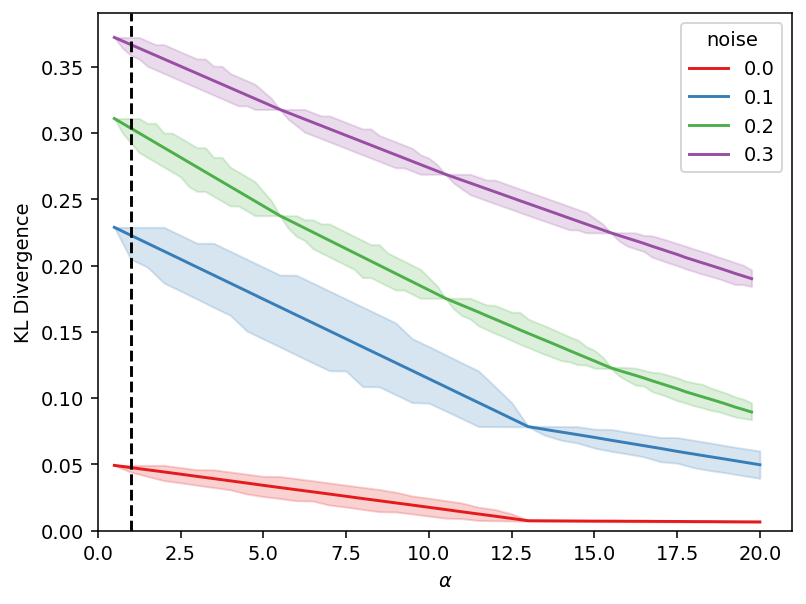

In [ ]:
balance=0.5
data = kl_df[kl_df.imbalance==balance][['alpha','kl','noise']]
print(data[data.noise==0.0])
sns.lineplot(x='alpha', y='kl', hue='noise', data=data, palette='Set1')
plt.axvline(1.0, linestyle='dashed', color='black')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'KL Divergence')
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.savefig('kldiv_no_title_ci_{b}.eps'.format(b=balance), dpi=1000)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


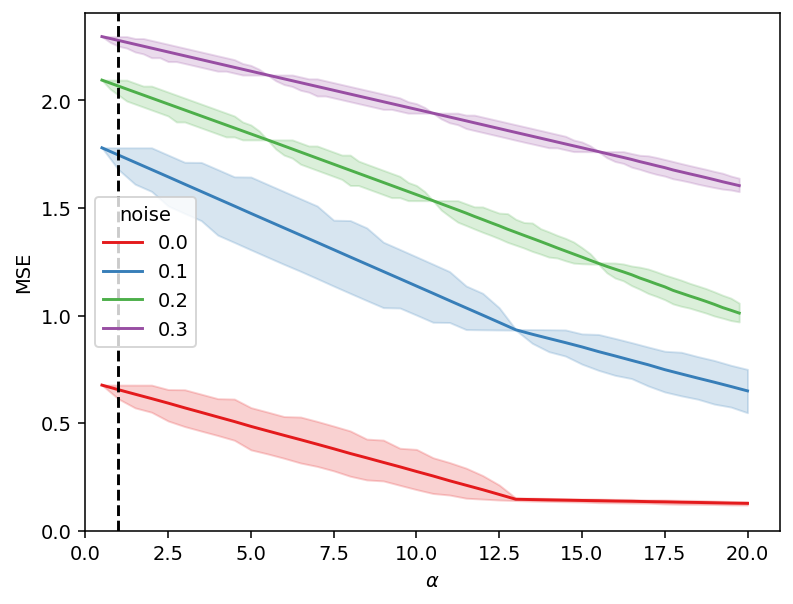

In [ ]:
sns.lineplot(x='alpha', y='mse', hue='noise', data=df[df.imbalance==balance][['alpha','mse','noise']], palette='Set1')
plt.axvline(1.0, linestyle='dashed', color='black')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'MSE')
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.savefig('mse_no_title_ci_{b}.eps'.format(b=balance), dpi=1000)

In [ ]:
alpha_list = [0.5, 1.0, 1.5,2.5]
df[[*alpha_list,'noise', 'imbalance']].groupby('imbalance').mean()[alpha_list].plot(title='MSE of Learned Weights and True Weights, Averaged over Noise',xlabel='Imbalance', ylabel=r'MSE of $\theta^*$ and $\theta^{\alpha}$')
kl_df[[*alpha_list,'noise', 'imbalance']].groupby('imbalance').mean()[alpha_list].plot(title='KL of Learned Posterior and True Posterior, Averaged over Noise',xlabel='Imbalance', ylabel=r'KL Divergence')

KeyError: '[0.5, 1.0, 1.5, 2.5] not in index'

<AxesSubplot:title={'center':'KL of Learned Weights and True Weights, 0 Noise'}, xlabel='Imbalance', ylabel='KL of $\\theta^*$ and $\\theta^{\\alpha}$'>

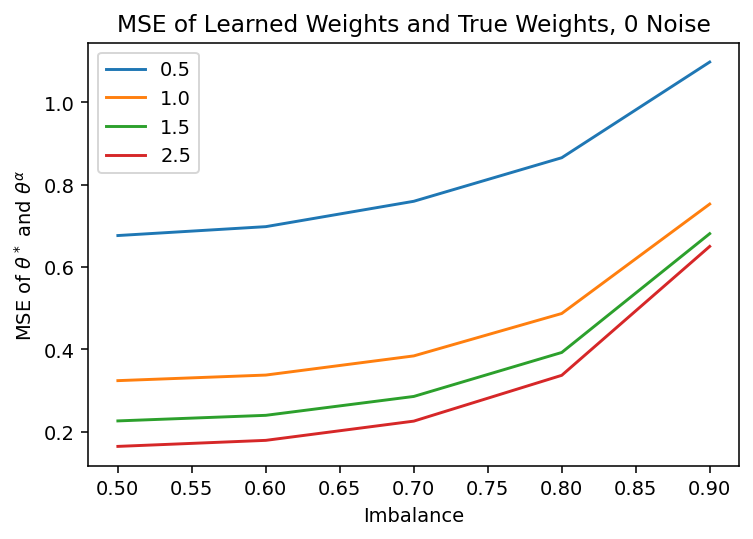

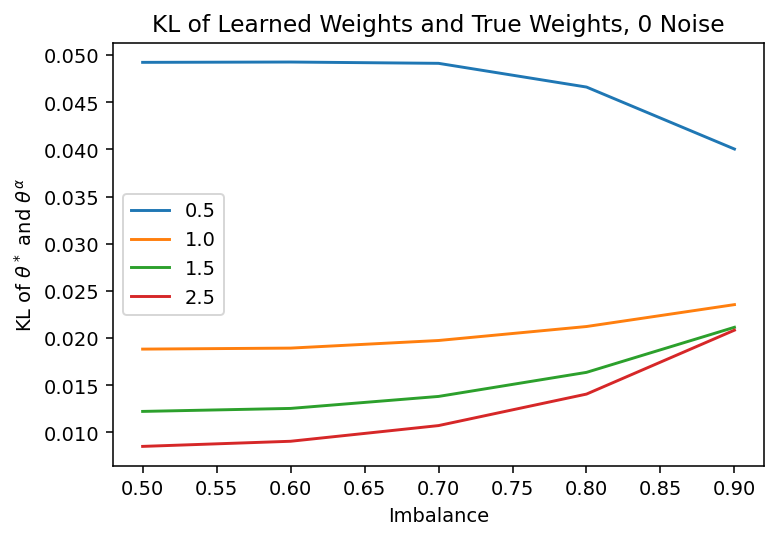

In [ ]:
df[df['noise']==0.0][[*alpha_list, 'imbalance']].plot(x='imbalance',title='MSE of Learned Weights and True Weights, 0 Noise',xlabel='Imbalance', ylabel=r'MSE of $\theta^*$ and $\theta^{\alpha}$')
kl_df[kl_df['noise']==0.0][[*alpha_list, 'imbalance']].plot(x='imbalance',title='KL of Learned Weights and True Weights, 0 Noise',xlabel='Imbalance', ylabel=r'KL of $\theta^*$ and $\theta^{\alpha}$')

<AxesSubplot:title={'center':'KL of Learned Weights and True Weights, 15% Noise'}, xlabel='Imbalance', ylabel='KL of $\\theta^*$ and $\\theta^{\\alpha}$'>

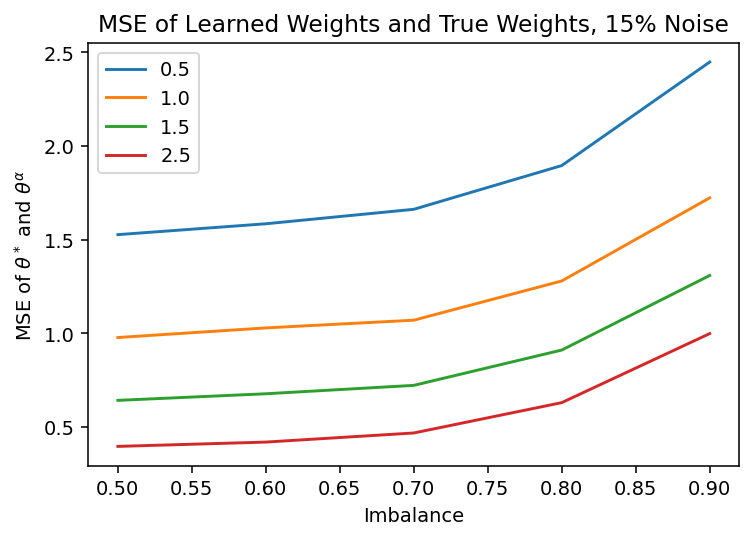

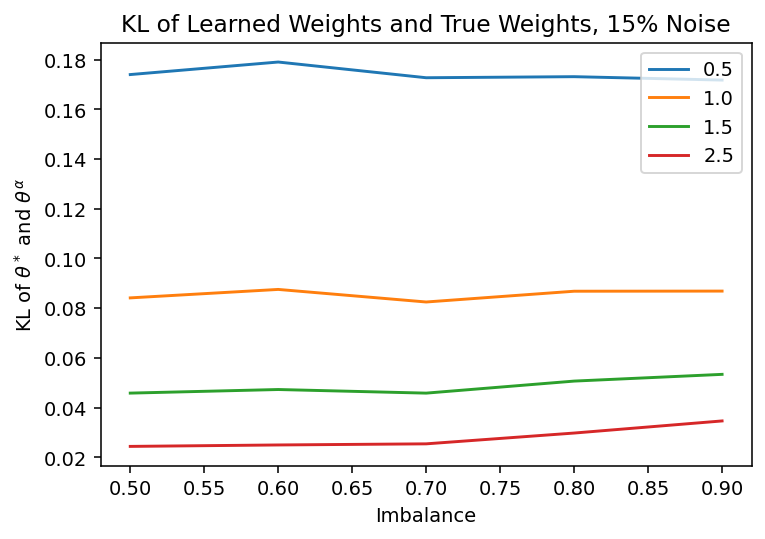

In [ ]:
df[df['noise']==0.05][[*alpha_list, 'imbalance']].plot(x='imbalance',title='MSE of Learned Weights and True Weights, 15% Noise',xlabel='Imbalance', ylabel=r'MSE of $\theta^*$ and $\theta^{\alpha}$')
kl_df[kl_df['noise']==0.05][[*alpha_list, 'imbalance']].plot(x='imbalance',title='KL of Learned Weights and True Weights, 15% Noise',xlabel='Imbalance', ylabel=r'KL of $\theta^*$ and $\theta^{\alpha}$')

<AxesSubplot:title={'center':'KL of Learned Weights and True Weights, Averaged over Imbalance'}, xlabel='Noise', ylabel='KL of $\\theta^*$ and $\\theta^{\\alpha}$'>

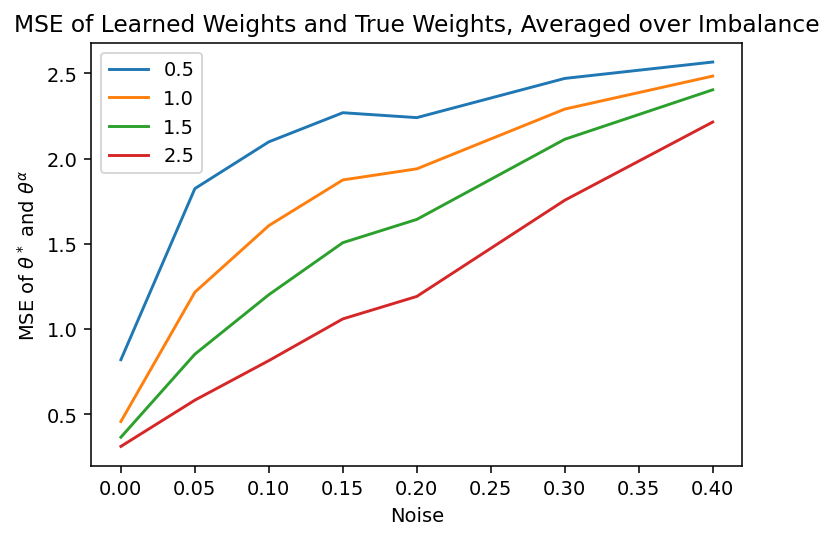

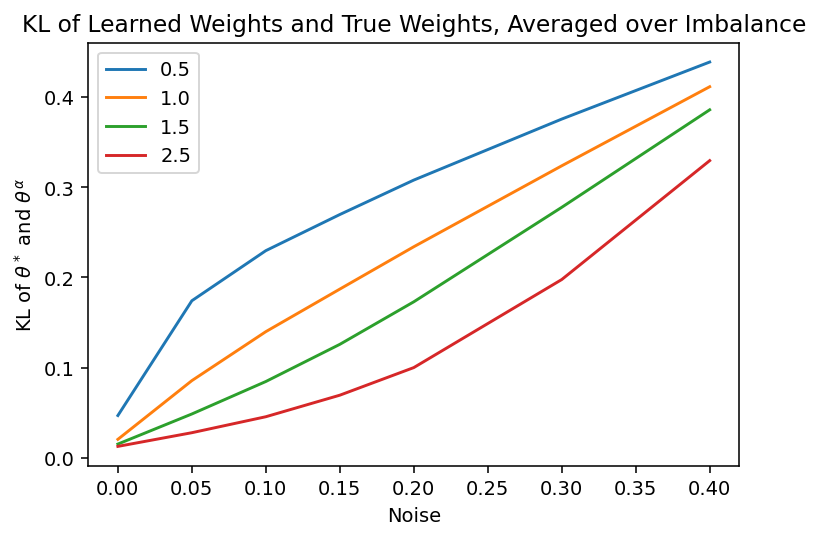

In [ ]:
df[[*alpha_list, 'noise', 'imbalance']].groupby('noise').mean()[alpha_list].plot(title='MSE of Learned Weights and True Weights, Averaged over Imbalance',xlabel='Noise', ylabel=r'MSE of $\theta^*$ and $\theta^{\alpha}$')
kl_df[[*alpha_list, 'noise', 'imbalance']].groupby('noise').mean()[alpha_list].plot(title='KL of Learned Weights and True Weights, Averaged over Imbalance',xlabel='Noise', ylabel=r'KL of $\theta^*$ and $\theta^{\alpha}$')

<AxesSubplot:title={'center':'KL of Learned Weights and True Weights, Balanced Classes'}, xlabel='Noise', ylabel='KL of $\\theta^*$ and $\\theta^{\\alpha}$'>

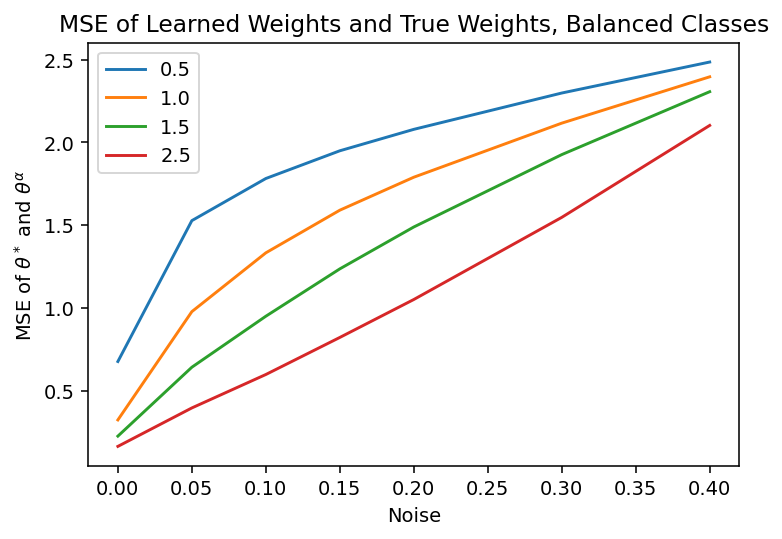

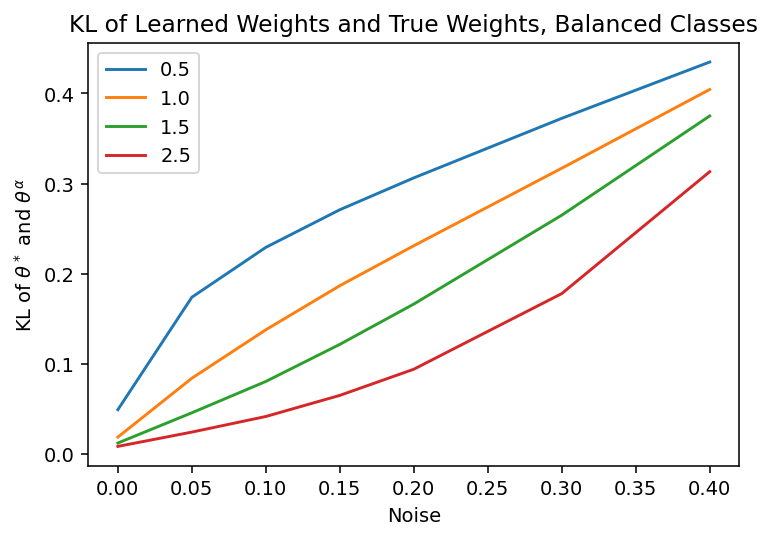

In [ ]:
df[df.imbalance==0.5][[*alpha_list, 'noise']].plot(x='noise',title='MSE of Learned Weights and True Weights, Balanced Classes',xlabel='Noise', ylabel=r'MSE of $\theta^*$ and $\theta^{\alpha}$')
kl_df[kl_df.imbalance==0.5][[*alpha_list, 'noise']].plot(x='noise',title='KL of Learned Weights and True Weights, Balanced Classes',xlabel='Noise', ylabel=r'KL of $\theta^*$ and $\theta^{\alpha}$')

<AxesSubplot:title={'center':'KL of Learned Weights and True Weights, 70:30 Imbalance'}, xlabel='Noise', ylabel='KL of $\\theta^*$ and $\\theta^{\\alpha}$'>

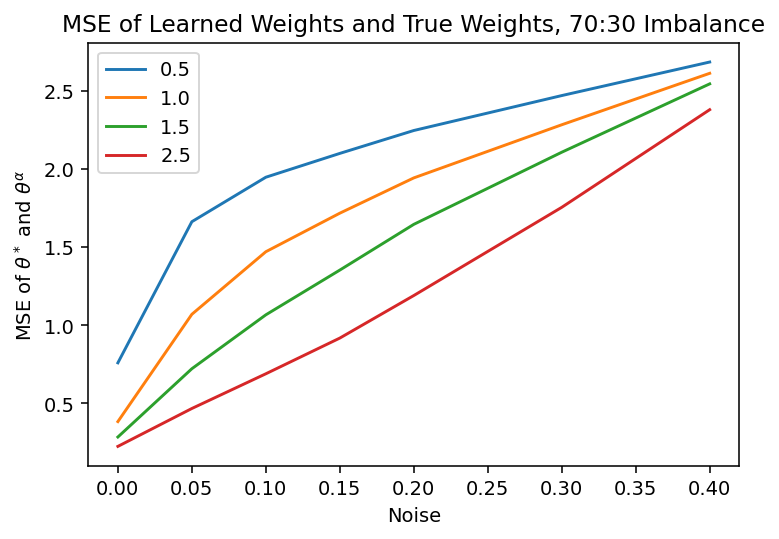

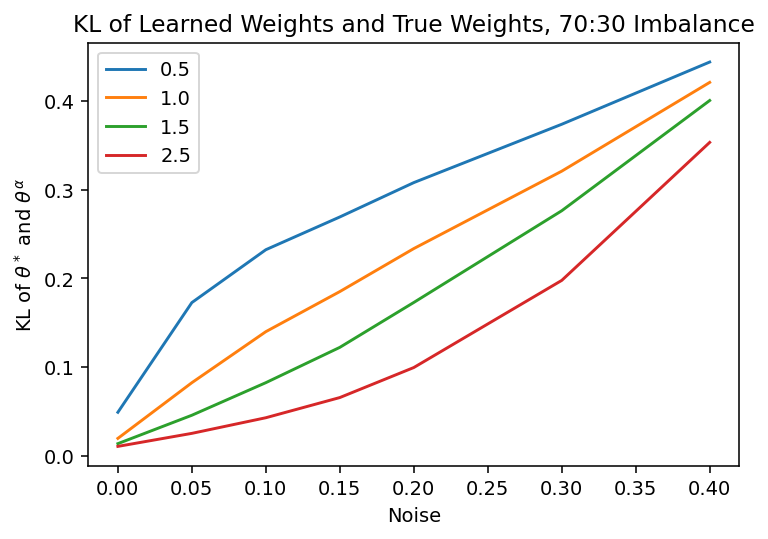

In [ ]:
df[df.imbalance==0.7][[*alpha_list, 'noise']].plot(x='noise',title='MSE of Learned Weights and True Weights, 70:30 Imbalance',xlabel='Noise', ylabel=r'MSE of $\theta^*$ and $\theta^{\alpha}$')
kl_df[kl_df.imbalance==0.7][[*alpha_list, 'noise']].plot(x='noise',title='KL of Learned Weights and True Weights, 70:30 Imbalance',xlabel='Noise', ylabel=r'KL of $\theta^*$ and $\theta^{\alpha}$')

TypeError: reduction operation 'argmin' not allowed for this dtype

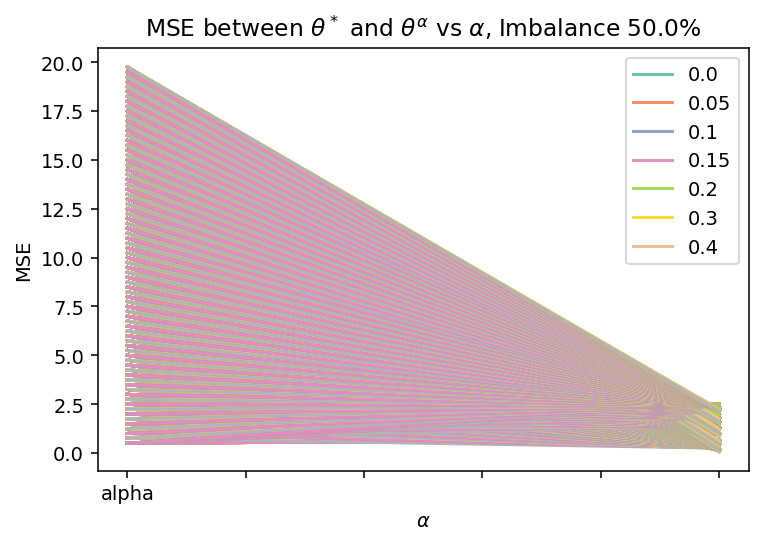

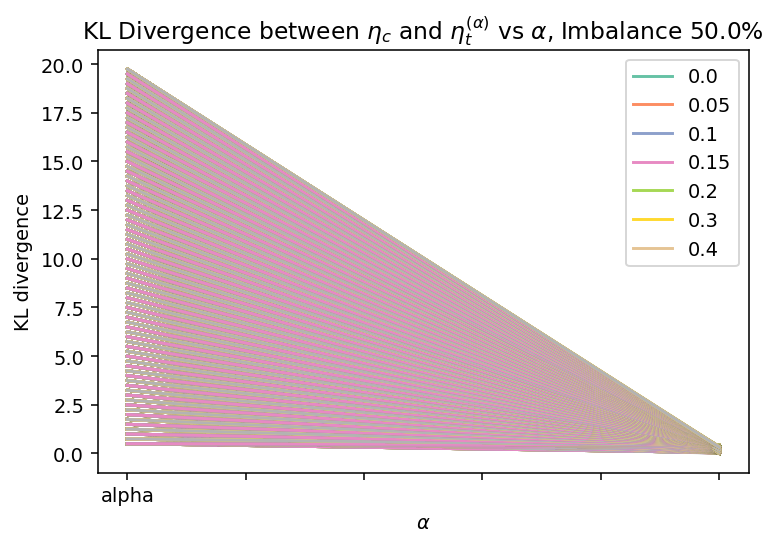

In [ ]:
balance = 0.5
df[df.imbalance==balance].iloc[:,:-2].T.plot(xlabel=r'$\alpha$', ylabel=r'MSE', title=r'MSE between $\theta^*$ and $\theta^{{\alpha}}$ vs $\alpha$, Imbalance {balance:.1%}'.format(balance=balance))
plt.legend([0.0,0.05, 0.1, 0.15, 0.2, 0.3, 0.4])
kl_df[kl_df.imbalance==balance].iloc[:,:-2].T.plot(xlabel=r'$\alpha$',ylabel=r'KL divergence', title=r'KL Divergence between $\eta_c$ and $\eta_t^{{(\alpha)}}$ vs $\alpha$, Imbalance {balance:.1%}'.format(balance=balance))
plt.legend([0.0,0.05, 0.1, 0.15, 0.2, 0.3, 0.4])
kl_df[kl_df.imbalance==balance].iloc[:,:-2].T.idxmin()
#df[df.imbalance==balance].iloc[:,:-2].T.idxmin()

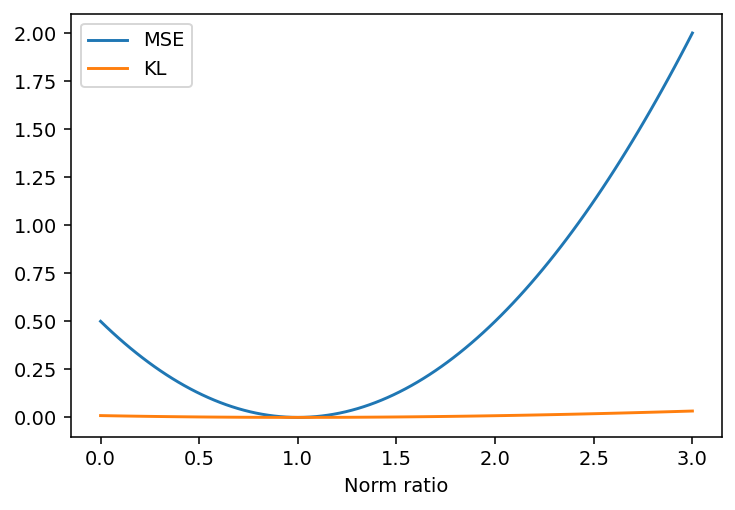

In [ ]:
from scipy.stats import entropy
def sigmoid(x):
    return 1/(1+np.exp(-x))
a = np.tile(np.array([np.sqrt(2)/2,-np.sqrt(2)/2]), (100,1))
x=np.linspace(0,3,100)
features = np.random.rand(2,1000)
plt.plot(x, np.square((a-x[:,np.newaxis]*a)).mean(axis=1), label='MSE')
plt.plot(x, entropy(sigmoid(a@features),sigmoid((x[:,np.newaxis]*a)@features), axis=1), label='KL')
plt.xlabel('Norm ratio')
plt.legend()

## Generate Reliability Diagram

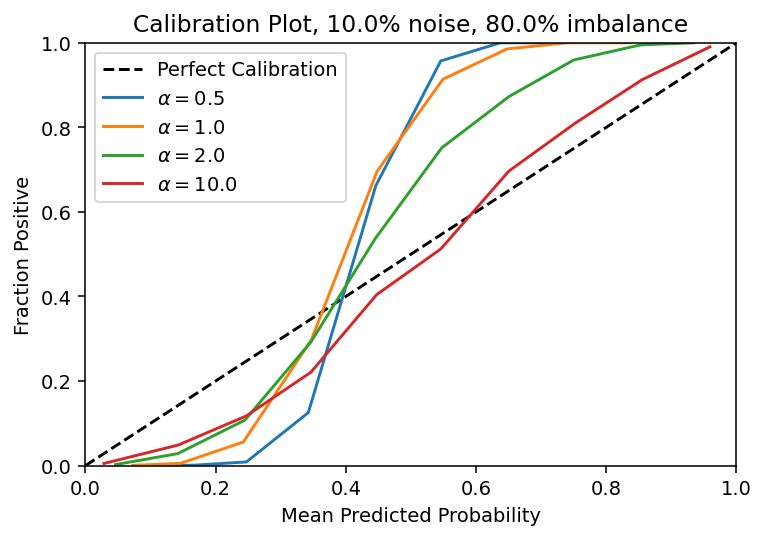

In [ ]:
from sklearn.calibration import calibration_curve
alphas = [0.5,1.0, 2.0, 10.0]
noise_list = [0.1]
imbalance_list = [0.8]
plt.title('Calibration Plot, {noise:.1%} noise, {imbalance:.1%} imbalance'.format(noise=noise_list[0], imbalance=imbalance_list[0]))
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction Positive')
plt.ylim((0,1))
plt.xlim((0,1))
plt.plot(np.linspace(0,1,5), np.linspace(0,1,5), linestyle='dashed', color='black', label='Perfect Calibration')
for (imbalance, noise, alpha) in [(i,n,a) for i in imbalance_list for n in noise_list for a in alphas]:
    posterior = np.load('posterior_{i}_{n}_{a}.npy'.format(i=imbalance, n=noise, a=alpha))
    y_test = np.load('y_test_{i}_{n}.npy'.format(i=imbalance, n = noise)).ravel()
    true_posterior = np.load('true_posterior_{i}_{n}.npy'.format(i=imbalance, n = noise))
    prob_true, prob_pred = calibration_curve(y_test, posterior, n_bins=10, strategy='uniform')
    plt.plot(prob_pred, prob_true, label=r'$\alpha={}$'.format(alpha))
plt.legend()

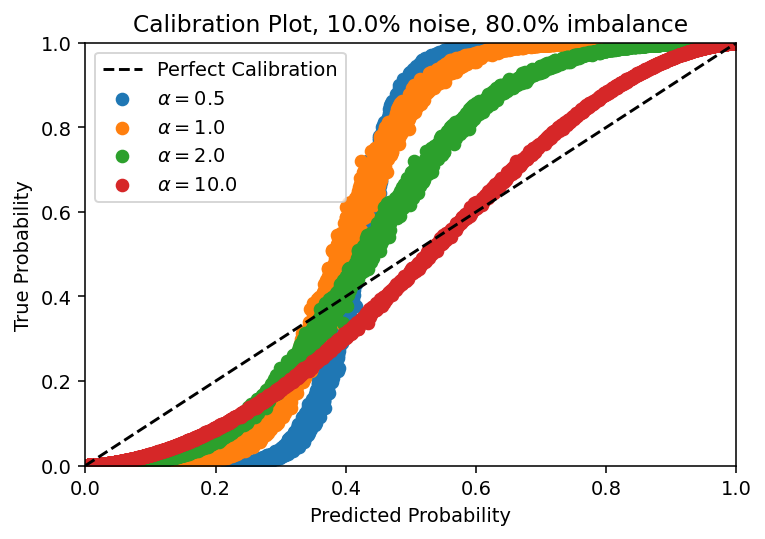

In [ ]:
alphas = [0.5,1.0, 2.0, 10.0]
noise_list = [0.1]
imbalance_list = [0.8]
plt.title('Calibration Plot, {noise:.1%} noise, {imbalance:.1%} imbalance'.format(noise=noise_list[0], imbalance=imbalance_list[0]))
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.ylim((0,1))
plt.xlim((0,1))
plt.plot(np.linspace(0,1,5), np.linspace(0,1,5), linestyle='dashed', color='black', label='Perfect Calibration')
for (imbalance, noise, alpha) in [(i,n,a) for i in imbalance_list for n in noise_list for a in alphas]:
    posterior = np.load('posterior_{i}_{n}_{a}.npy'.format(i=imbalance, n=noise, a=alpha))
    true_posterior = np.load('true_posterior_{i}_{n}.npy'.format(i=imbalance, n = noise))
    plt.scatter(posterior, true_posterior, label=r'$\alpha={}$'.format(alpha))
plt.legend()

In [ ]:
from scipy.stats import entropy
alpha_list = list(np.arange(0.5,20, 0.25))
imbalance_list = [0.5, 0.6, 0.7, 0.8, 0.9]
noise_list=[0.0, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4]

clean_posterior = np.load('posterior_0.5_0.0_1.0.npy')
kl_clean_df = pd.DataFrame(columns=[*alpha_list, 'imbalance', 'noise'])

for (imbalance, noise) in ((i,n)for i in imbalance_list for n in noise_list):
    if 1-imbalance < noise/2: continue
    kl_list = []
    for alpha in alpha_list:
        posterior = np.load('posterior_{imbalance}_{noise}_{alpha}.npy'.format(imbalance=imbalance, noise=noise, alpha=alpha))
        kl = entropy([clean_posterior, 1-clean_posterior], [posterior, 1-posterior]).mean()
        kl_list.append(kl)
    kl_clean_df.loc[len(kl_clean_df)] = [*kl_list,imbalance, noise]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


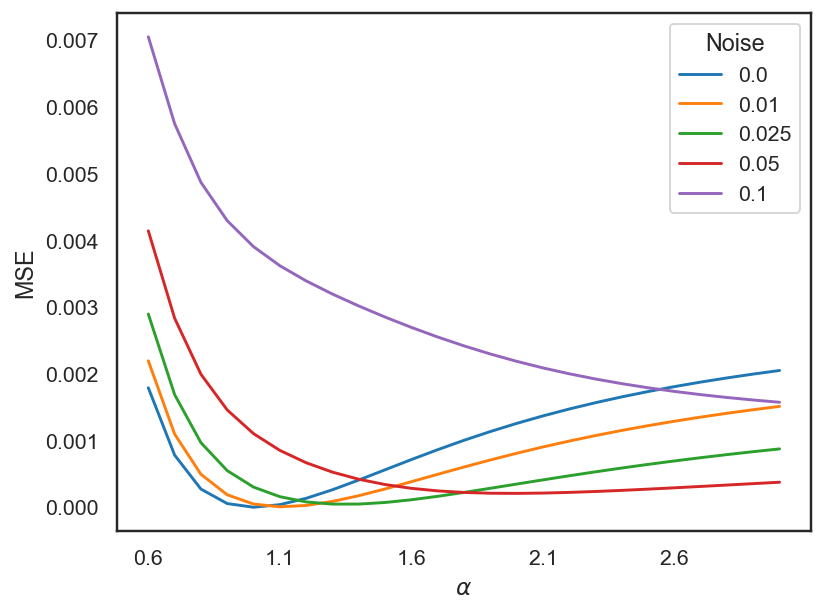

In [12]:
noise_subset = [0.0, 0.01, 0.025, 0.05, 0.1]
plt.rcParams['legend.loc']='upper left'
mse = pd.read_csv('mse.csv', index_col='Noise')
mse.T[noise_subset].plot(xlabel=r'$\alpha$', ylabel='MSE')
plt.legend(loc='upper right', title='Noise')
plt.savefig('mse_no_title.eps',format='eps',dpi=1000)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


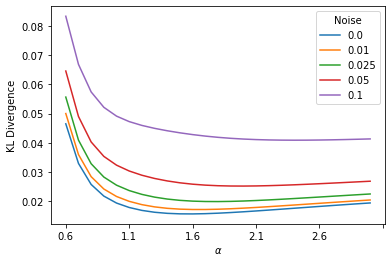

In [ ]:
kl = pd.read_csv('kl.csv',index_col='noise')
kl.T[noise_subset].plot(xlabel=r'$\alpha$', ylabel='KL Divergence')
plt.legend(loc='upper right', title='Noise')
plt.savefig('kldiv_no_title.eps', format='eps', dpi=1000)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


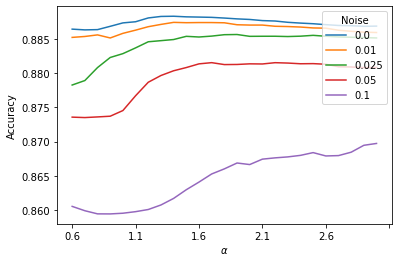

In [ ]:
acc = pd.read_csv('acc.csv',index_col='noise') /100
acc.T[noise_subset].plot(xlabel=r'$\alpha$', ylabel='Accuracy')
plt.legend(loc='upper right', title='Noise')
plt.savefig('accuracy.eps', dpi=1000)

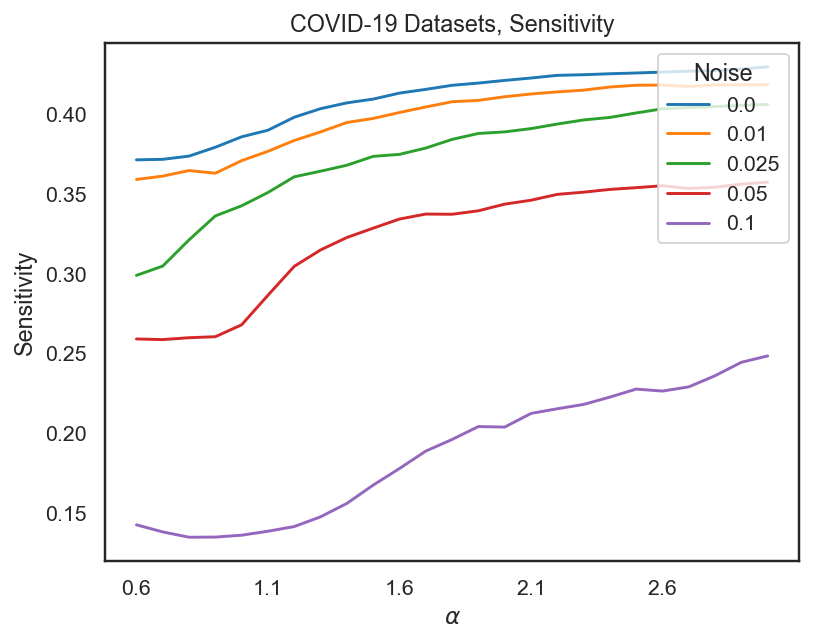

In [14]:
sensitivity = pd.read_csv('sensitivity.csv',index_col='noise')
sensitivity.T[noise_subset].plot(xlabel=r'$\alpha$', ylabel='Sensitivity',title='COVID-19 Datasets, Sensitivity')
plt.legend(loc='upper right', title='Noise')
plt.savefig('sensitivity.png', dpi=1000)

(0.0, 1.0)

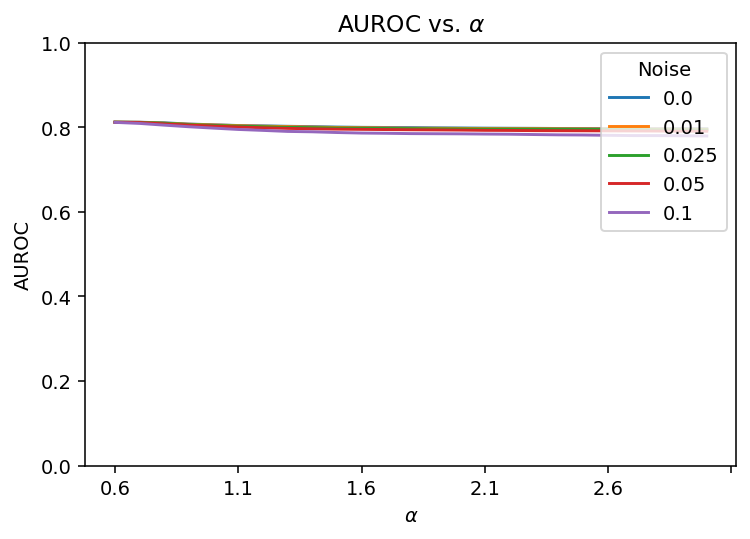

In [ ]:
auroc = pd.read_csv('auroc.csv',index_col='noise')
auroc.T[noise_subset].plot(xlabel=r'$\alpha$', ylabel='AUROC', title=r'AUROC vs. $\alpha$')
plt.legend(loc='upper right', title='Noise')
plt.ylim((0,1))

In [ ]:
thetas = pd.read_pickle('theta.pkl')
thetas

,alpha,noise,imbalance,theta_0,theta_1,theta_2,mse,kl
0,0.5,0.0,0.5,0.002953,0.996942,1.056224,0.796994,0.045045
1,0.5,0.0,0.5,0.003126,0.996882,1.055866,0.797341,0.045071
2,0.5,0.0,0.5,0.003271,0.996982,1.055866,0.797341,0.045065
3,0.5,0.0,0.5,0.003033,0.997108,1.056104,0.796996,0.045042
4,0.5,0.0,0.5,0.003722,0.997388,1.055662,0.797410,0.045051
...,...,...,...,...,...,...,...,...
4795,20.0,0.2,0.2,-1.195389,1.002948,1.023004,0.731348,0.036046
4796,20.0,0.2,0.2,-1.014245,0.995696,1.297947,0.533418,0.026559
4797,20.0,0.2,0.2,-0.670293,1.271863,1.381832,0.304399,0.021939
4798,20.0,0.2,0.2,-0.934029,1.265660,1.043380,0.503049,0.025732


In [3]:
data = pd.read_csv('COVID-19 Logistic Model - 20 Experiments Data.csv')
data

,Unnamed: 0.1,Unnamed: 0,alpha,noise,stratified,accuracy,f1,mcc,auroc,avg_precision,...,tp,Age,Tired,ShortBreath,Aches,Cough,Fever,Gender,LossOfSmellTaste,MSE_theta
0,0,0,0.5,0.00,True,88.642540,0.508041,0.497739,0.812011,0.595999,...,8956,-0.005536,0.058193,-0.080837,-0.095605,0.097826,-0.121693,-0.222737,0.448349,0.002266
1,1,1,0.5,0.00,True,88.640575,0.507691,0.497579,0.811841,0.595900,...,8945,0.045628,0.195786,-0.046595,-0.043107,-0.037893,-0.017776,0.145576,-0.050184,0.002974
2,2,2,0.5,0.00,True,88.607835,0.505148,0.495612,0.811886,0.596130,...,8880,-0.006049,-0.000908,0.083479,0.150890,0.241038,-0.031300,0.048003,0.167454,0.002714
3,3,3,0.5,0.00,True,88.641230,0.507733,0.497617,0.812028,0.596024,...,8946,0.215182,0.023071,0.202490,0.020346,0.348863,0.084598,-0.069775,0.006163,0.002129
4,4,4,0.5,0.00,True,88.612419,0.505474,0.495881,0.811876,0.596104,...,8888,-0.127673,-0.034870,-0.245696,-0.038527,0.184672,-0.041272,-0.025093,-0.109786,0.002059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4155,4155,15,3.0,0.15,True,84.312365,0.022362,0.082927,0.756462,0.508818,...,274,0.186275,0.101633,0.134476,-0.027333,-0.065837,0.223493,0.241860,0.014838,0.005845
4156,4156,16,3.0,0.15,True,86.107819,0.275707,0.321260,0.777934,0.512664,...,4038,-0.136362,-0.200981,0.065895,-0.041798,0.160946,-0.174972,-0.188214,-0.004403,0.006193
4157,4157,17,3.0,0.15,True,85.204853,0.147969,0.231237,0.759067,0.485426,...,1962,0.011301,-0.000093,-0.213887,0.105178,0.180607,0.252181,0.055928,-0.200703,0.006089
4158,4158,18,3.0,0.15,True,84.532376,0.062619,0.136343,0.676187,0.419219,...,789,0.344677,0.144338,0.023324,-0.170685,0.005993,-0.196607,-0.085220,-0.156094,0.007336


/var/folders/d4/wd4d40ns2nn0xdsyvt1z3k2c0000gn/T/ipykernel_1403/3506637235.py:6: UserWarning: The handle <matplotlib.collections.PolyCollection object at 0x14ff313a0> has a label of '_nolegend_' which cannot be automatically added to the legend.
  plt.legend(loc='upper right', title='Noise', labels=['0%', '_nolegend_','10%', '_nolegend_', '15%'])
/var/folders/d4/wd4d40ns2nn0xdsyvt1z3k2c0000gn/T/ipykernel_1403/3506637235.py:6: UserWarning: The handle <matplotlib.collections.PolyCollection object at 0x14ff66190> has a label of '_nolegend_' which cannot be automatically added to the legend.
  plt.legend(loc='upper right', title='Noise', labels=['0%', '_nolegend_','10%', '_nolegend_', '15%'])


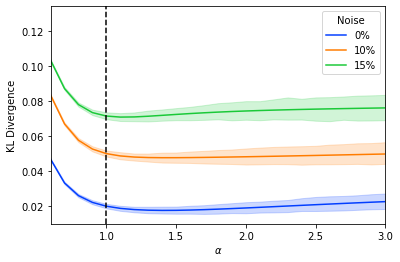

In [ ]:
sns.lineplot(x='alpha', y='kl-div', hue='noise', data=data[(data.noise==0) |  (data.noise == .1) | (data.noise==0.15)], palette='bright', ci=95)
plt.axvline(x=1.0, linestyle='dashed', color='black')
plt.xlim(0.6,3)
plt.ylabel('KL Divergence')
plt.xlabel(r'$\alpha$')
plt.legend(loc='upper right', title='Noise', labels=['0%', '_nolegend_','10%', '_nolegend_', '15%'])
plt.savefig('KL_covid_ci.png', dpi=1000)

In [ ]:
baseline = data[(data.noise==0)&(data.alpha==1)].iloc[:, 17:25].copy()
baseline = np.log(baseline)
baseline

/usr/local/anaconda3/envs/ds/lib/python3.10/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


,Age,Tired,ShortBreath,Aches,Cough,Fever,Gender,LossOfSmellTaste
800,NaN,-3.875873,NaN,NaN,-2.116985,NaN,NaN,-0.596036
801,-4.581278,-1.610160,NaN,NaN,NaN,-3.014103,-2.043008,-2.599823
802,NaN,-3.529946,-3.019410,-1.779535,-1.190374,-3.733163,-3.253196,-1.296260
803,-1.661338,-3.010743,-1.378987,-2.902280,-1.022960,-2.465851,NaN,-2.190271
804,NaN,-3.814220,NaN,NaN,-1.599046,NaN,NaN,NaN
805,NaN,-1.825679,-6.302176,-1.537298,-1.556277,-0.913421,NaN,-1.116455
806,-1.459528,-1.709510,NaN,NaN,-1.233884,-0.979620,-2.955318,NaN
807,-6.578454,NaN,NaN,NaN,-1.217295,NaN,-3.074688,-1.452027
808,-4.505545,-3.412988,-4.169815,NaN,NaN,NaN,-3.993567,-1.385563
809,-2.262291,NaN,-2.075193,NaN,NaN,-2.381970,-1.387435,-3.020207


/var/folders/d4/wd4d40ns2nn0xdsyvt1z3k2c0000gn/T/ipykernel_39628/1284146707.py:8: UserWarning: The handle <matplotlib.collections.PolyCollection object at 0x142710220> has a label of '_nolegend_' which cannot be automatically added to the legend.
  plt.legend(loc='upper right', title='Noise', labels=['0%', '_nolegend_','10%', '_nolegend_', '15%'])
/var/folders/d4/wd4d40ns2nn0xdsyvt1z3k2c0000gn/T/ipykernel_39628/1284146707.py:8: UserWarning: The handle <matplotlib.collections.PolyCollection object at 0x142712800> has a label of '_nolegend_' which cannot be automatically added to the legend.
  plt.legend(loc='upper right', title='Noise', labels=['0%', '_nolegend_','10%', '_nolegend_', '15%'])


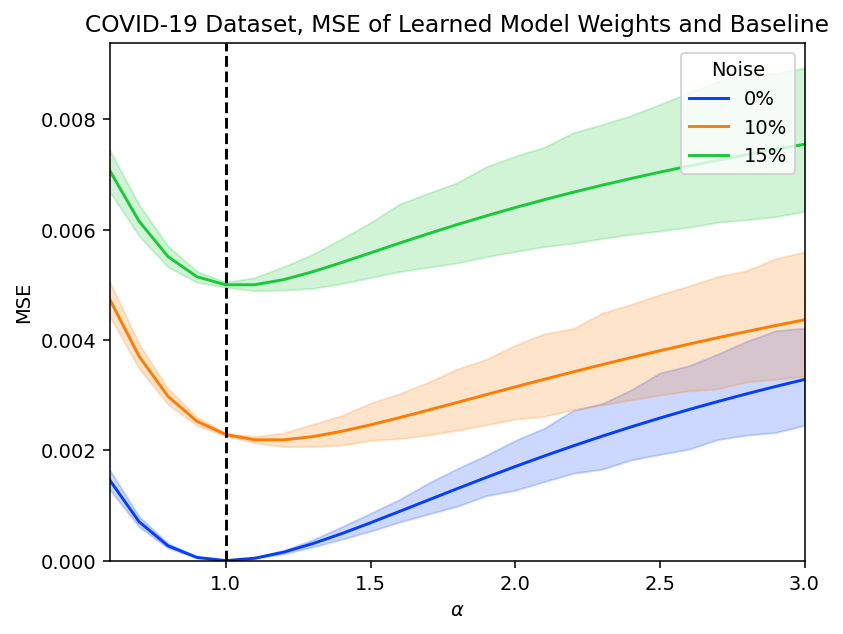

In [4]:
sns.lineplot(x='alpha', y='MSE_theta', hue='noise', data=data[(data.noise==0) | (data.noise==.1) | (data.noise == .15)], palette='bright', ci=95)
plt.axvline(x=1.0, linestyle='dashed', color='black')
plt.xlim(0.6,3)
plt.ylabel('MSE')
plt.ylim(bottom=0)
plt.xlabel(r'$\alpha$')
plt.title('COVID-19 Dataset, MSE of Learned Model Weights and Baseline')
plt.legend(loc='upper right', title='Noise', labels=['0%', '_nolegend_','10%', '_nolegend_', '15%'])
plt.savefig('MSE_covid_ci.png', dpi=1000)

In [ ]:
data

,Unnamed: 0.1,Unnamed: 0,alpha,noise,stratified,accuracy,f1,mcc,auroc,avg_precision,...,Gender,LossOfSmellTaste,Recall,Prec_c,F1_c,pi,pi_0,1-accuracy,0-accuracy,MSE_theta
0,0,0,0.6,0.005,True,88.641885,0.507580,0.497613,0.813130,0.595866,...,0.798839,1.612478,0.370018,0.955448114,0.533447,0.164,0.5,0.370018,0.983470,0.000149
1,1,1,0.6,0.005,True,88.663493,0.509449,0.498950,0.813423,0.596537,...,1.066626,1.319216,0.372087,0.9553462292,0.535578,0.164,0.5,0.372087,0.983338,0.000552
2,2,2,0.6,0.005,True,88.617657,0.505589,0.496135,0.812289,0.596305,...,1.273634,1.071911,0.367866,0.955501306,0.531215,0.164,0.5,0.367866,0.983587,0.000742
3,3,3,0.6,0.005,True,88.483424,0.494859,0.487978,0.810962,0.595271,...,1.002948,1.380276,0.356566,0.9555676322,0.519342,0.164,0.5,0.356566,0.984116,0.001289
4,4,4,0.6,0.005,True,88.609145,0.504895,0.495617,0.811924,0.596046,...,1.153950,1.246669,0.367121,0.9555159821,0.530440,0.164,0.5,0.367121,0.983626,0.000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2120,2270,0,5.0,0.200,True,84.179441,0.000000,0.000000,0.705733,0.297590,...,0.794964,1.318211,0.000000,#DIV/0!,0.000000,0.164,0.5,0.000000,1.000000,0.001454
2121,2271,1,5.0,0.200,True,84.013777,0.005783,0.003006,0.496374,0.154879,...,1.237473,1.024243,0.002939,0.5276464104,0.005845,0.164,0.5,0.002939,0.997480,0.016272
2122,2272,2,5.0,0.200,True,88.644504,0.534093,0.505176,0.800189,0.583195,...,1.260270,1.115582,0.411407,0.9419788784,0.572692,0.164,0.5,0.411407,0.975723,0.002733
2123,2273,3,5.0,0.200,True,85.639639,0.212220,0.277628,0.674424,0.435871,...,0.910111,1.350141,0.122263,0.9541255197,0.216751,0.164,0.5,0.122263,0.994368,0.004585


alpha
0.6    0.001202
0.7    0.001054
0.8    0.000920
0.9    0.000817
1.0    0.000738
1.1    0.000677
1.2    0.000635
1.3    0.000616
1.4    0.000625
1.5    0.000660
1.6    0.000714
1.7    0.000779
1.8    0.000851
1.9    0.000924
2.0    0.000996
2.1    0.001066
2.2    0.001132
2.3    0.001196
2.4    0.001256
2.5    0.001314
2.6    0.001368
2.7    0.001420
2.8    0.001469
2.9    0.001516
3.0    0.001561
3.1    0.018410
3.2    0.018392
3.3    0.018374
3.4    0.018357
3.5    0.018340
3.6    0.018324
3.7    0.018308
3.8    0.018293
3.9    0.018278
4.0    0.018264
4.1    0.018251
4.2    0.018237
4.3    0.018225
4.4    0.018212
4.5    0.018201
4.6    0.018189
4.7    0.018178
4.8    0.018168
4.9    0.018158
5.0    0.018148
Name: MSE_theta, dtype: float64

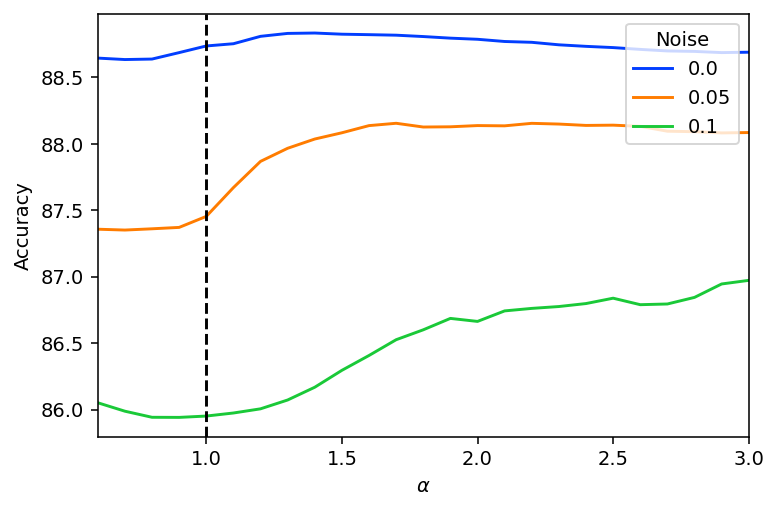

In [ ]:
sns.lineplot(x='alpha', y='accuracy', hue='noise', data=data[(data.alpha <=3 )&((data.noise==0) | (data.noise==.1) | (data.noise == .05) )], palette='bright', ci=None)
plt.axvline(x=1.0, linestyle='dashed', color='black')
plt.xlim(0.6,3)
plt.xlabel(r'$\alpha$')
plt.ylabel('Accuracy')
plt.legend(title='Noise', loc='upper right')
plt.savefig('acc_covid_ci.png', dpi=1000)
data[(data.alpha<=3)&(data.noise==0) | (data.noise == 0.1) | (data.noise==0.05)].groupby('alpha')['MSE_theta'].sem()*2.776

In [ ]:
from scipy.stats import entropy
a = np.array([0.1,0.1,0.1])
b = np.array([[0.2,0.2,0.2],[0.1,0.1,0.1]])
print(a.shape, b.shape)
print(np.array([a,1-a]).shape, np.array([b,1-b]).shape)
print(entropy([[a], [1-a]],[b, 1-b],axis=0, base=2).mean(axis=1))
print(entropy([[0.1,0.9]], [[0.1,0.9],[0.5,0.5]], axis=1))

(3,) (2, 3)
(2, 3) (2, 2, 3)
[0.0529325 0.       ]
[0.         0.36806421]


/var/folders/d4/wd4d40ns2nn0xdsyvt1z3k2c0000gn/T/ipykernel_39628/653898763.py:5: UserWarning: The handle <matplotlib.collections.PolyCollection object at 0x143b2fc10> has a label of '_nolabel_' which cannot be automatically added to the legend.
  plt.legend(title='Noise', labels=['0%','_nolabel_','10%','_nolabel_','15%'])
/var/folders/d4/wd4d40ns2nn0xdsyvt1z3k2c0000gn/T/ipykernel_39628/653898763.py:5: UserWarning: The handle <matplotlib.collections.PolyCollection object at 0x143b2ea70> has a label of '_nolabel_' which cannot be automatically added to the legend.
  plt.legend(title='Noise', labels=['0%','_nolabel_','10%','_nolabel_','15%'])


      Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  alpha  noise  stratified  \
0                0             0           0    0.5   0.00        True   
1                1             1           1    0.5   0.00        True   
2                2             2           2    0.5   0.00        True   
3                3             3           3    0.5   0.00        True   
4                4             4           4    0.5   0.00        True   
...            ...           ...         ...    ...    ...         ...   
6235          6235          6235          25    3.0   0.15        True   
6236          6236          6236          26    3.0   0.15        True   
6237          6237          6237          27    3.0   0.15        True   
6238          6238          6238          28    3.0   0.15        True   
6239          6239          6239          29    3.0   0.15        True   

       accuracy        f1       mcc     auroc  ...       Age     Tired  \
0     88.613728  0.505531  0.495950  

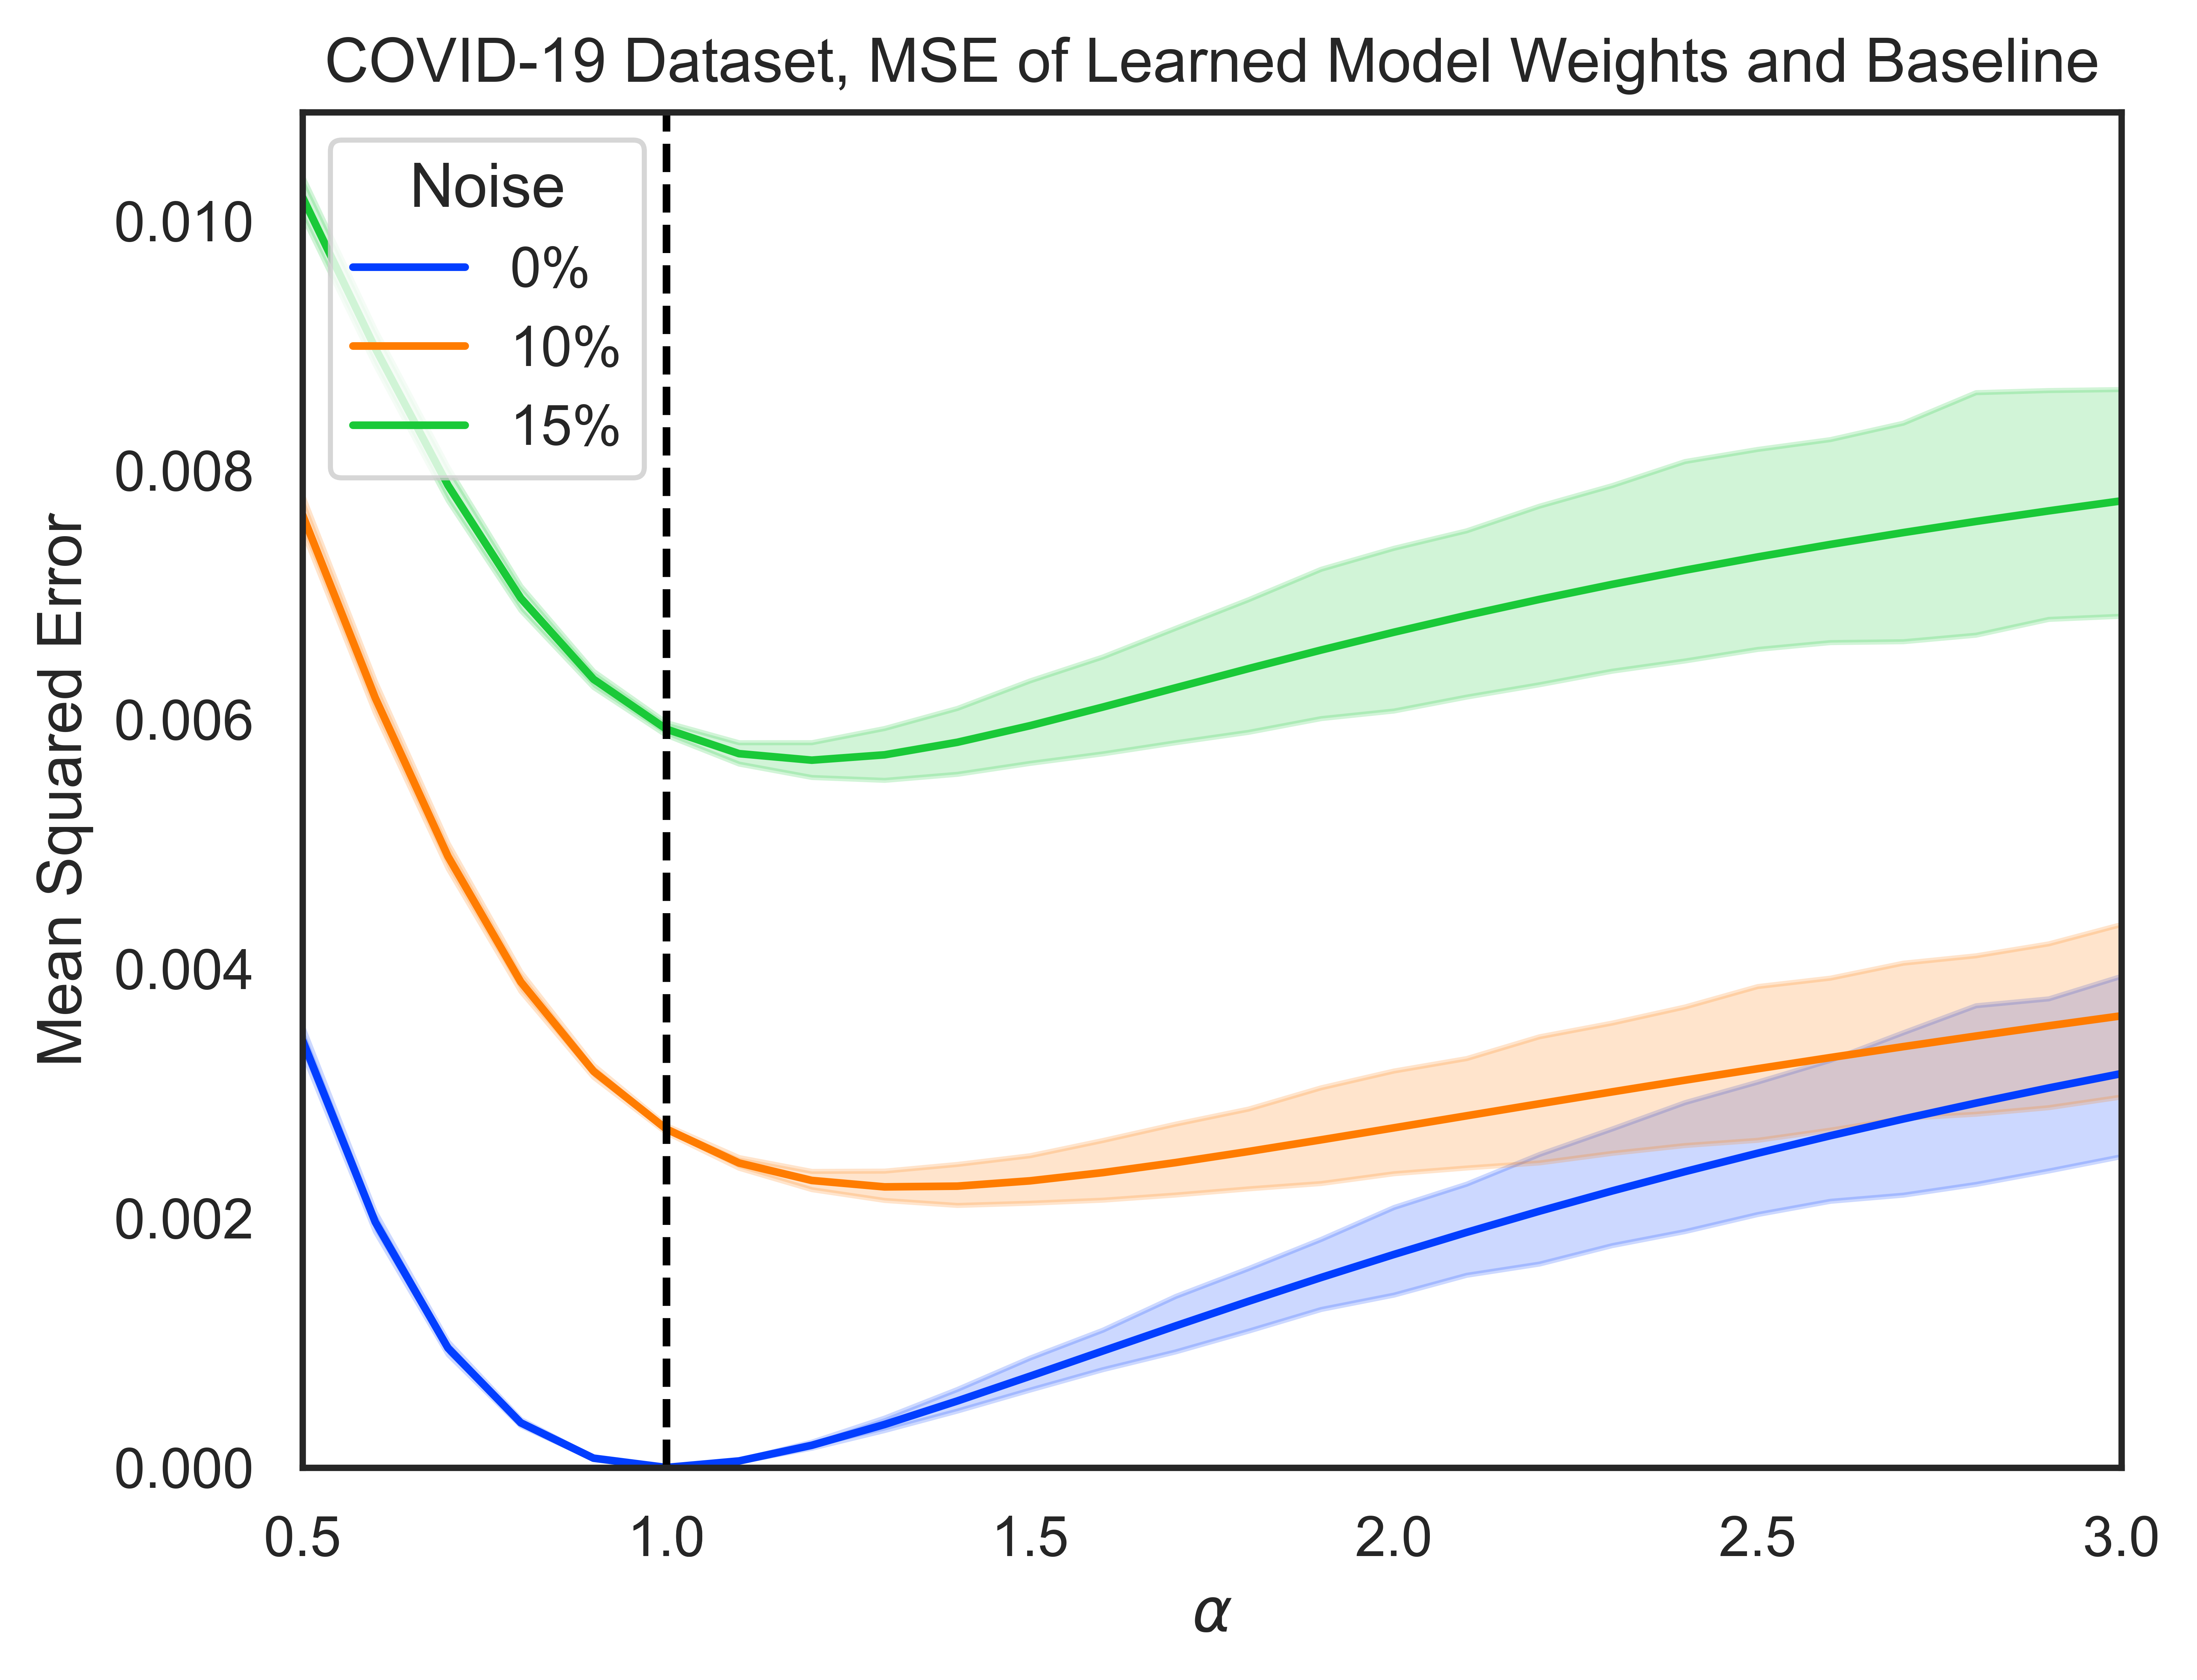

In [17]:
new_kl = pd.read_csv('new_kl_added_mse.csv')
sns.set_style('white')
sns.set_context('notebook')
sns.lineplot(data=new_kl[new_kl.noise.isin([0,0.1,0.15])], x='alpha', hue='noise', y='mse', palette='bright')
plt.legend(title='Noise', labels=['0%','_nolabel_','10%','_nolabel_','15%'])
plt.ylabel('Mean Squared Error')
plt.xlabel(r'$\alpha$')
plt.axvline(x=1.0, linestyle='dashed', color='black')
plt.xlim(0.5,3.0)
plt.xticks(list(plt.xticks()[0]) + [1.0])
plt.ylim(bottom=0)
plt.title('COVID-19 Dataset, MSE of Learned Model Weights and Baseline')
plt.savefig('fixed_mse_covid_ci.png',dpi=1000)
print(new_kl)